In [31]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('dengue1.csv')
df.sample()

,Name,Fever,Headache,JointPain,Bleeding,Dengue
14,Denise Lewis,1,0,1,0,1


In [4]:
    df = df.drop(['Name'], axis=1)
    df.sample()

,Fever,Headache,JointPain,Bleeding,Dengue
78,1,0,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Fever      124 non-null    int64
 1   Headache   124 non-null    int64
 2   JointPain  124 non-null    int64
 3   Bleeding   124 non-null    int64
 4   Dengue     124 non-null    int64
dtypes: int64(5)
memory usage: 5.0 KB


In [6]:
ind_col = [col for col in df.columns if col != 'Dengue']
dep_col = 'Dengue'

In [7]:
df[dep_col].value_counts()

Dengue
1    63
0    61
Name: count, dtype: int64

In [8]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [9]:
df.head()

,Fever,Headache,JointPain,Bleeding,Dengue
0,0,0,1,1,1
1,1,1,1,0,1
2,0,1,1,0,0
3,0,1,0,1,1
4,0,0,1,0,1


In [10]:
df.to_csv('dengue-fever.csv', index=False)

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## model decision tree

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))

# tn, fp, fn, tp = confusion.ravel()
print(f"classifiction report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.6363636363636364
akurasi data testing = 0.52 

confusion matrix : 
[[7 8]
 [4 6]]

classifiction report : 
               precision    recall  f1-score   support

           0       0.64      0.47      0.54        15
           1       0.43      0.60      0.50        10

    accuracy                           0.52        25
   macro avg       0.53      0.53      0.52        25
weighted avg       0.55      0.52      0.52        25



In [13]:
# data = df[['Fever', 'Headache', 'JointPain', 'Bleeding']]

input_data = [0,0,1,1]

input_data_as_numpy__array = np.array(input_data)

input_data_reshape = input_data_as_numpy__array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print ('Pasien tidak terkena Demam Berdarah')
else:
    print ('Pasien terkena Demam Berdarah')

[1]
Pasien terkena Demam Berdarah


c:\Users\zarqz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


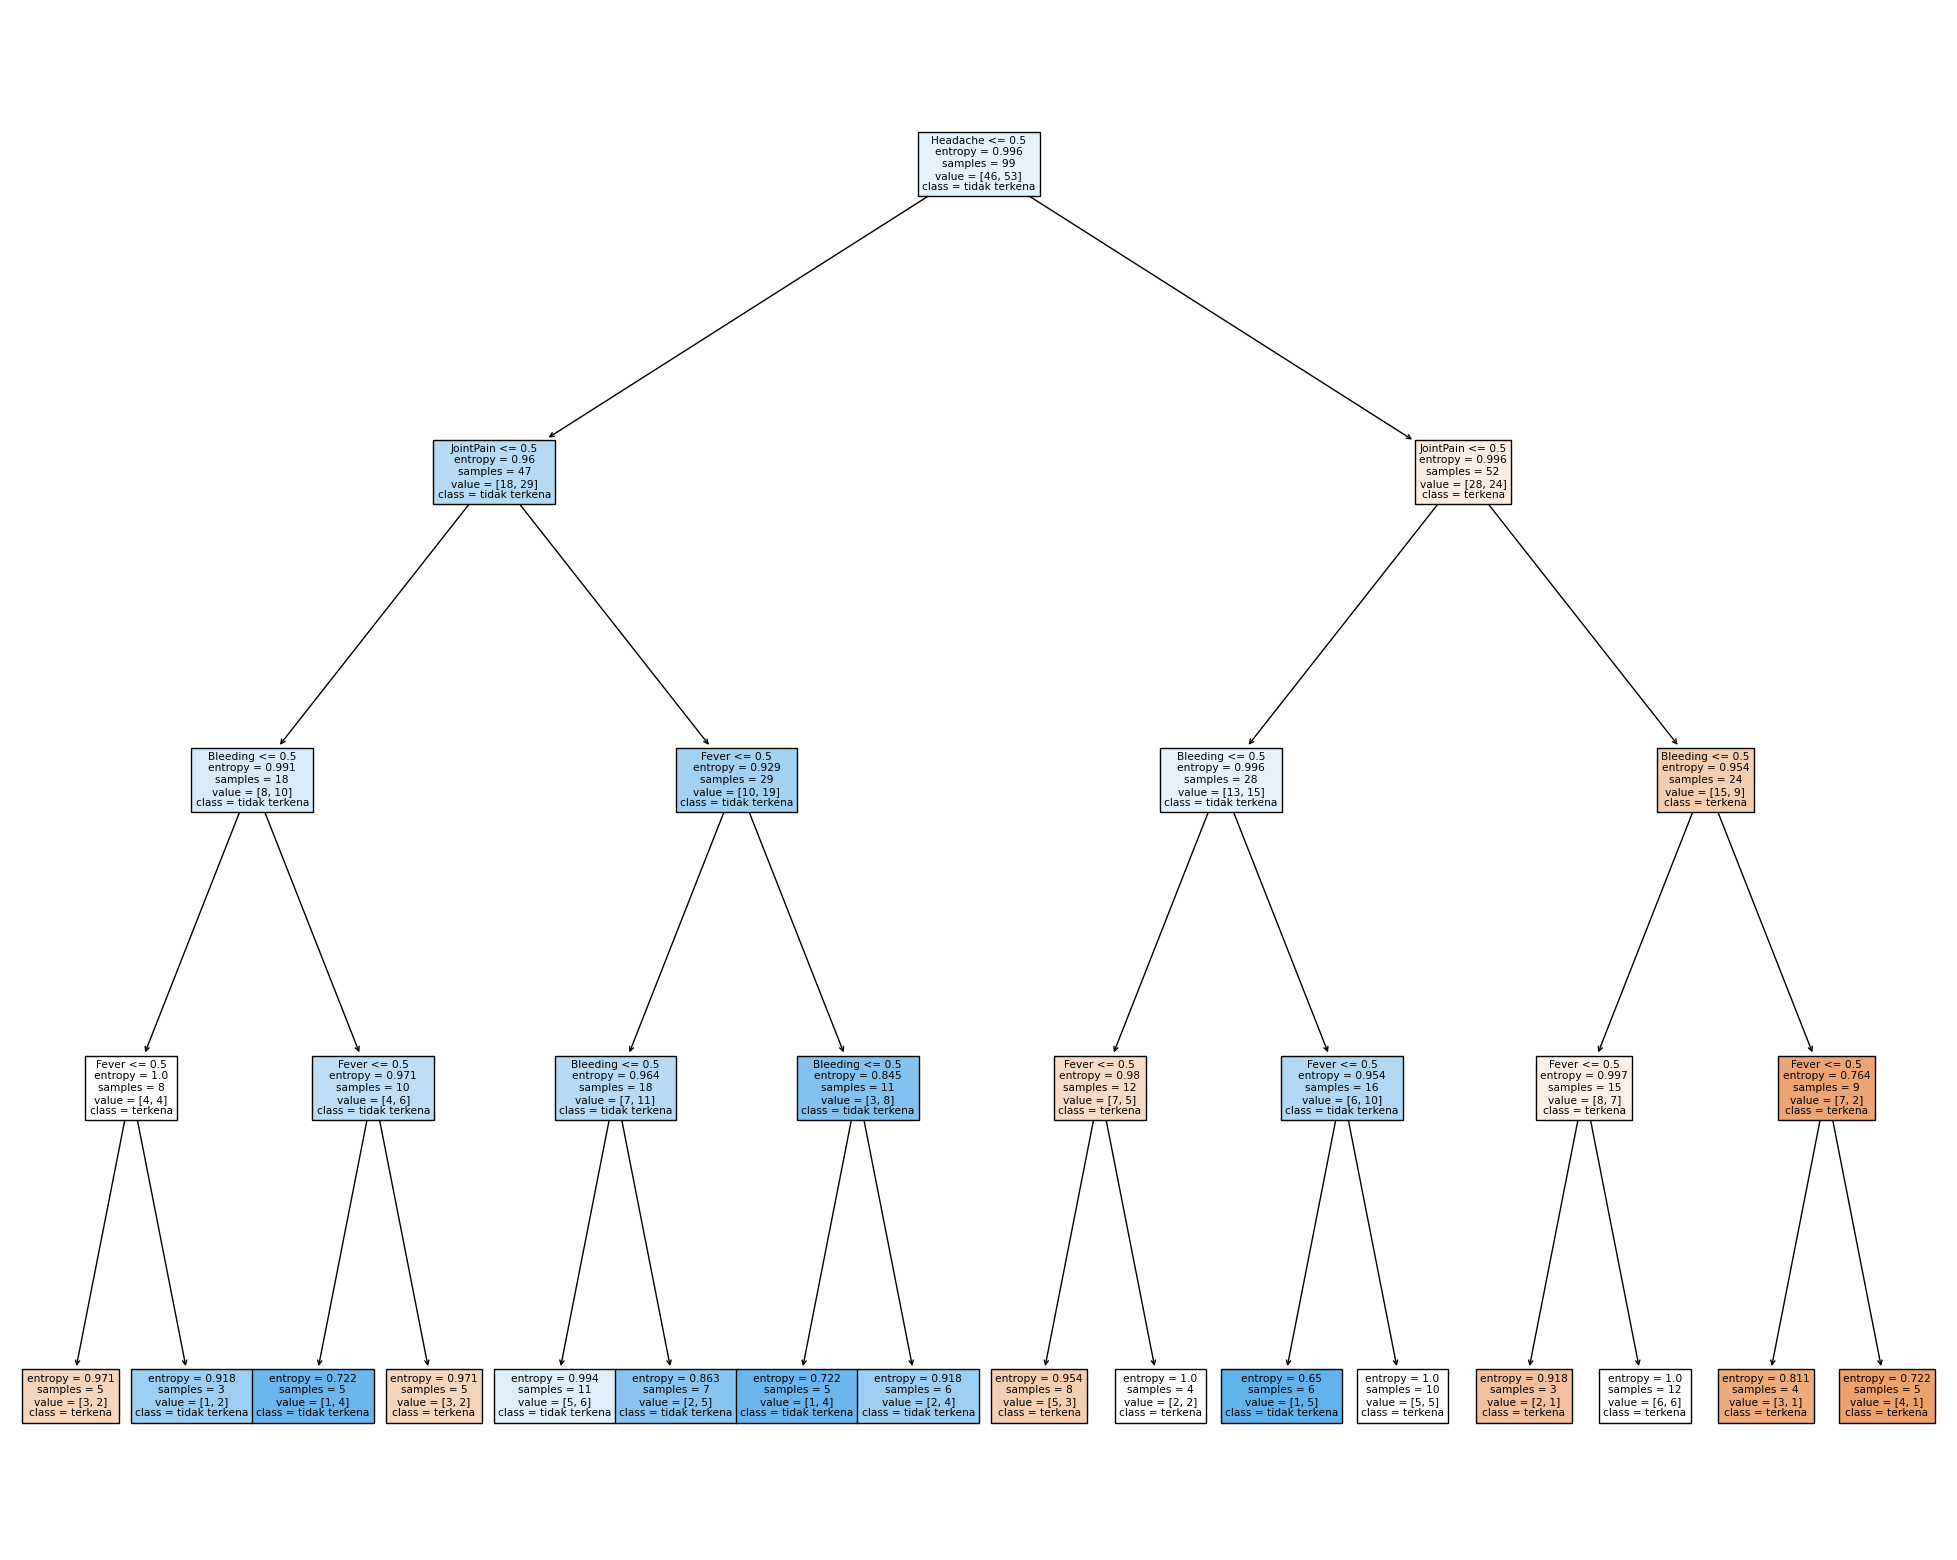

In [14]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                    feature_names=ind_col,
                    class_names=['terkena','tidak terkena'],
                    filled=True)

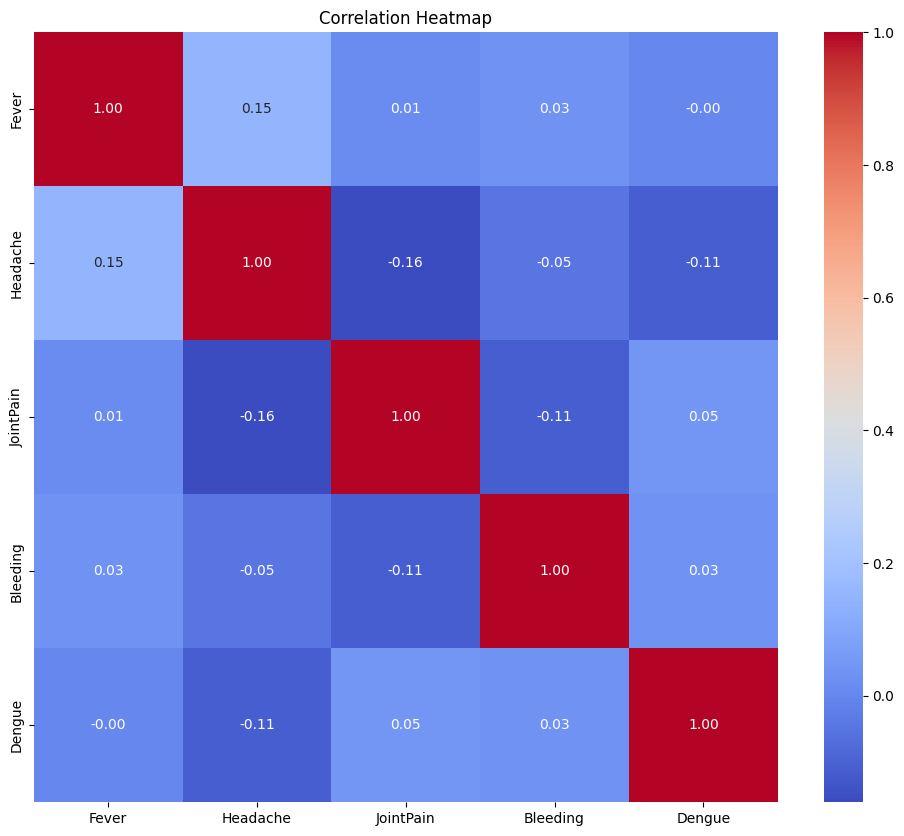

In [32]:
# melihat korelasi antar kolom menggunakan heatmap
correlation_matrix = df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [33]:
# split data menjadi train X dan y

X = df.drop(columns='Dengue')
y = df[['Dengue']]

In [34]:
# Normalisasi X menggunakan StandarScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [35]:
X_trainDt, X_testDt, y_trainDt, y_testDt = train_test_split(X, y, test_size=0.2, random_state=2003)

In [36]:
# Decision Tree
Dt = DecisionTreeClassifier(max_depth=5, random_state=0)

In [37]:
# decision Tree
Dt_model = Dt.fit(X_trainDt,y_trainDt)
y_pred_Dt = Dt.predict(X_testDt)

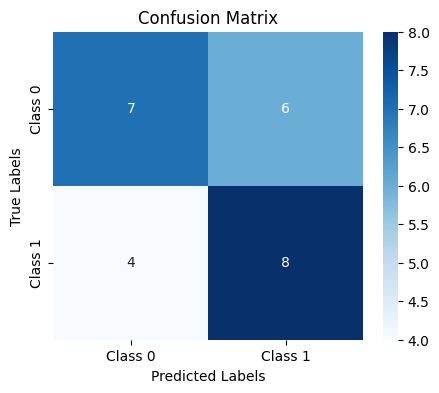

In [38]:
# Decision Tree
# melihat confusion matrix
Dt_cm = confusion_matrix(y_testDt, y_pred_Dt)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(Dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

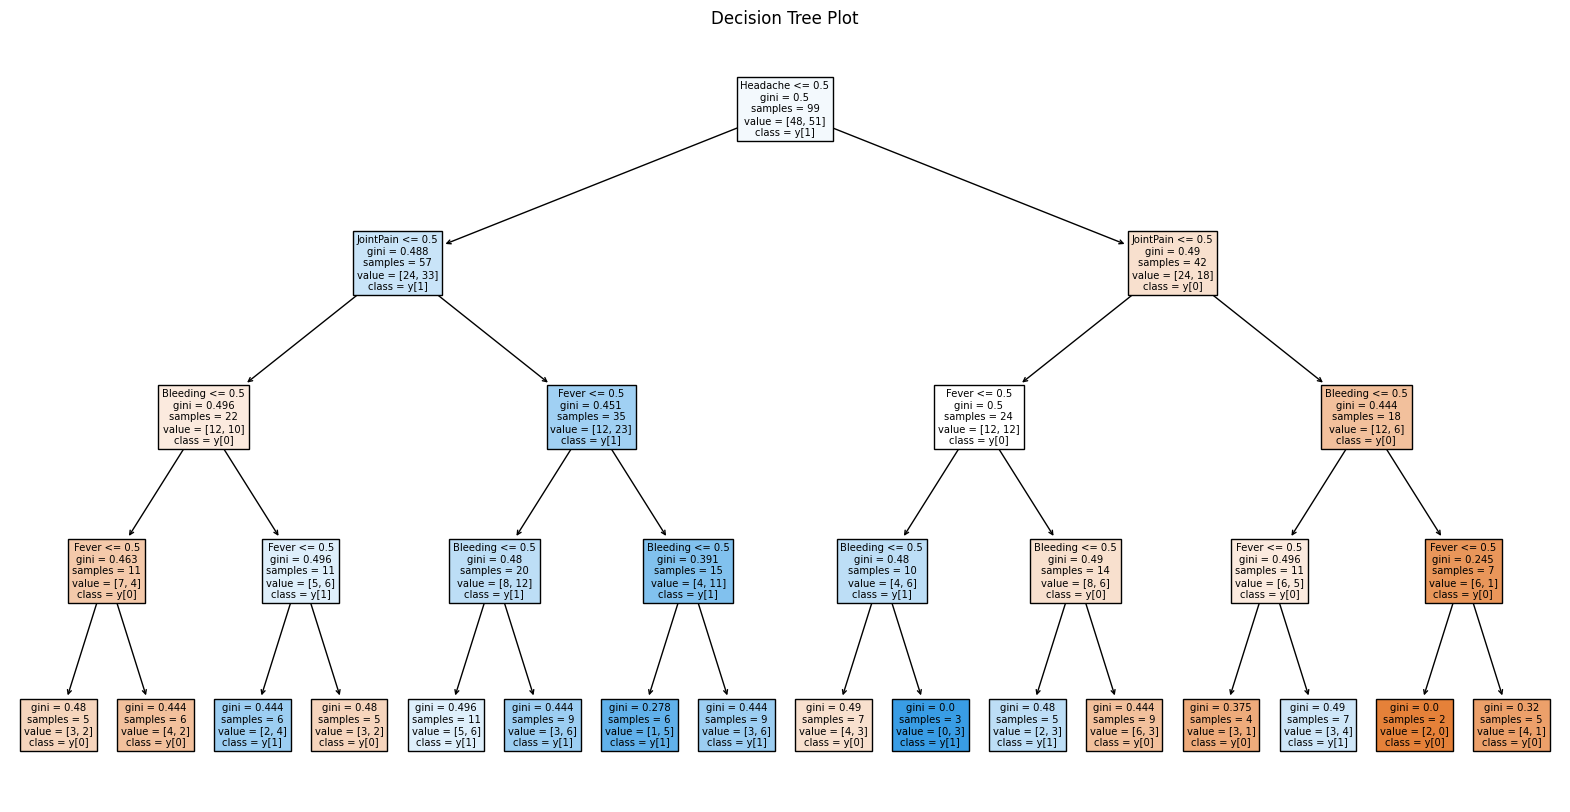

In [39]:
features = ['Fever', 'Headache', 'JointPain', 'Bleeding']
plt.figure(figsize=(20, 10))
plot_tree(Dt_model, filled=True, feature_names= features, class_names=True)
plt.title("Decision Tree Plot")
plt.show()